In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

import funciones_auxiliares as aux

# warnings.filterwarnings('ignore')
sns.set_theme()
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
df = pd.read_csv('income-db.csv')
df_depurada = df.replace('?', np.nan)
df_depurada = df_depurada.dropna()
df_recodificada = aux.recodificar_enunciado_uno(df_depurada)
df_final = aux.one_hot_todas_las_categoricas(df_recodificada)
df_final.columns = df_final.columns.str.replace('-', '_')

In [27]:
y = df_final['income']
X = df_final.drop(columns='income')
X_escalado = StandardScaler().fit_transform(X)

In [10]:
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X, y, test_size=0.335, random_state=1)

In [15]:
standarize = StandardScaler().fit(X_train_pre)
X_train = standarize.transform(X_train_pre)
X_test = standarize.transform(X_test_pre)

In [18]:
model = LogisticRegression().fit(X_train, y_train)

In [22]:
yhat = model.predict(X_test)

In [25]:
false_positive, true_positive, threshold = roc_curve(y_test, yhat)

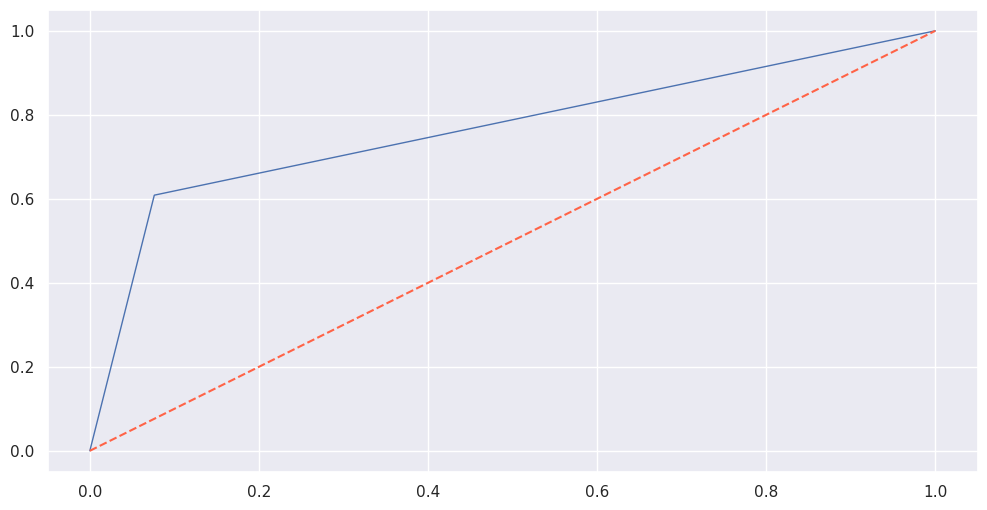

In [26]:
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], linestyle='--', color='tomato')

In [34]:
cross_val_score(LogisticRegression(),
                X=X_escalado,
                y=y,
                cv=10,
                scoring='f1')

ValueError: scoring value <function roc_auc_score at 0x7fcbefa2a310> looks like it is a metric function rather than a scorer. A scorer should require an estimator as its first parameter. Please use `make_scorer` to convert a metric to a scorer.